In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder                 # to transform data format
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

In [57]:
basket = pd.read_csv('../input/basket.csv')

In [58]:
basket.head()     #   show data

,Shrimp,Summer Sausage,Strawberry Soda,Vanilla Ice Cream,Potato Chips,Strawberry Yogurt,Plain White Bread,Blueberry Yogurt,Frozen Chicken Thighs,Mixed Vegetables,...,Plain Muffins,Cheese Dip,Colby Cheese,Chicken Noodle Soup,Fingernail Clippers,Corned Beef,Lollipops,Toilet Paper,White Wine,Columbian Coffee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
basket.info()     #  see type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Columns: 255 entries,  Shrimp to  Columbian Coffee
dtypes: int64(255)
memory usage: 2.6 MB


In [60]:
basket.describe()

,Shrimp,Summer Sausage,Strawberry Soda,Vanilla Ice Cream,Potato Chips,Strawberry Yogurt,Plain White Bread,Blueberry Yogurt,Frozen Chicken Thighs,Mixed Vegetables,...,Plain Muffins,Cheese Dip,Colby Cheese,Chicken Noodle Soup,Fingernail Clippers,Corned Beef,Lollipops,Toilet Paper,White Wine,Columbian Coffee
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,...,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.00000,1361.000000,1361.000000,1361.000000
mean,0.007348,0.038207,0.006613,0.008082,0.097722,0.036738,0.008082,0.027921,0.030125,0.035268,...,0.011756,0.030860,0.032329,0.039677,0.021308,0.023512,0.04335,0.074210,0.024982,0.030125
std,0.085434,0.191767,0.081080,0.089570,0.297048,0.188186,0.089570,0.164806,0.170994,0.184525,...,0.107826,0.173001,0.176938,0.195270,0.144462,0.151579,0.20372,0.262209,0.156126,0.170994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [61]:
bk_convert = basket.replace( {0: False, 1: True} )   #   convert data
bk_convert

,Shrimp,Summer Sausage,Strawberry Soda,Vanilla Ice Cream,Potato Chips,Strawberry Yogurt,Plain White Bread,Blueberry Yogurt,Frozen Chicken Thighs,Mixed Vegetables,...,Plain Muffins,Cheese Dip,Colby Cheese,Chicken Noodle Soup,Fingernail Clippers,Corned Beef,Lollipops,Toilet Paper,White Wine,Columbian Coffee
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1357,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1358,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1359,False,True,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,True,False,False


In [62]:
bk_convert.info()    #   see type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Columns: 255 entries,  Shrimp to  Columbian Coffee
dtypes: bool(255)
memory usage: 339.0 KB


---

💡 **Apriori Algorithm**

---

In [63]:
# select support is more than 0.025 & max number of items are 2

frequent_itemsets1 = apriori(bk_convert, min_support = 0.025, max_len = 2, use_colnames = True)
frequent_itemsets1

,support,itemsets
0,0.038207,( Summer Sausage)
1,0.097722,( Potato Chips)
2,0.036738,( Strawberry Yogurt)
3,0.027921,( Blueberry Yogurt)
4,0.030125,( Frozen Chicken Thighs)
...,...,...
378,0.029390,"( Toilet Paper, Toothpaste)"
379,0.026451,"( Sweet Relish, Ramen Noodles)"
380,0.030860,"( Sweet Relish, Wheat Bread)"
381,0.027921,"( Toilet Paper, Wheat Bread)"


In [64]:
# confidence is more than 0.6

frequent_itemsets1 = association_rules(frequent_itemsets1, metric = "confidence", min_threshold = 0.6)
frequent_itemsets1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467
4,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
5,( Raisins),( Eggs),0.060985,0.122704,0.036738,0.602410,4.909458,0.029255,2.206533
6,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
7,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
8,( Plain Bagels),( Eggs),0.044085,0.122704,0.026451,0.600000,4.889820,0.021042,2.193240
9,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669


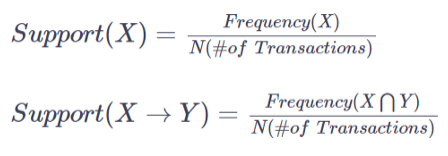

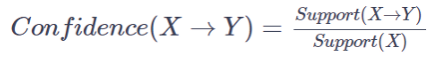

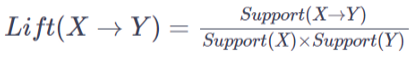

In [65]:
#  sort lift value

frequent_itemsets1 = frequent_itemsets1.sort_values(by = ['lift'],ascending = False)
frequent_itemsets1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
11,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
6,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
7,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
10,( Canned Tuna),( White Bread),0.054372,0.119030,0.033064,0.608108,5.108859,0.026592,2.247992
9,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467


In [66]:
top5 = frequent_itemsets1.head()
top5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
11,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
6,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888


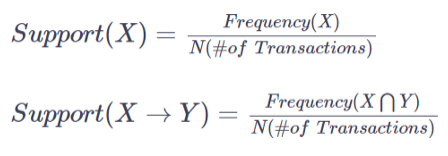

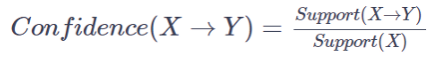

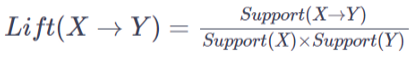

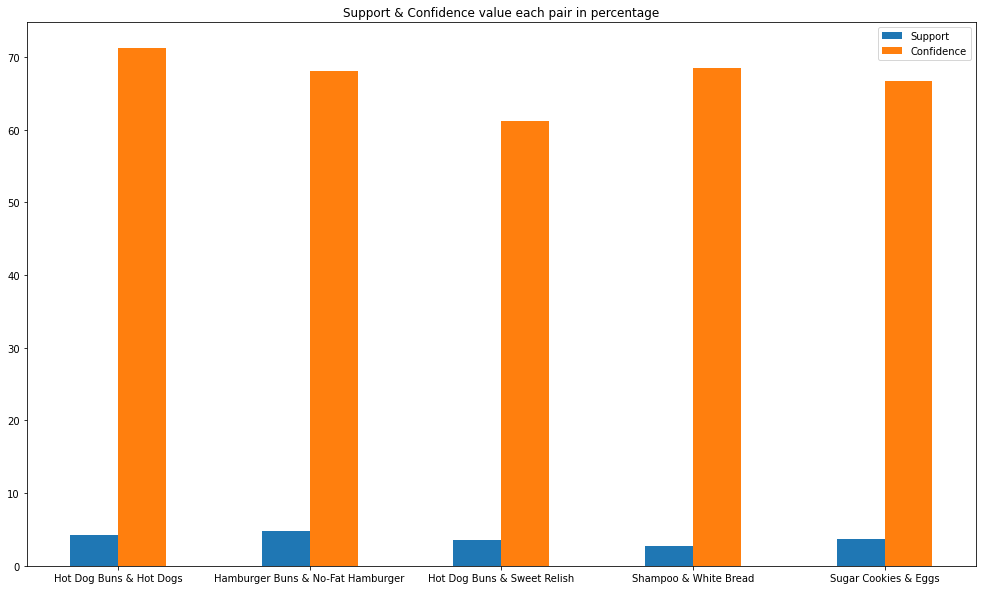

In [67]:
N = 5                                   # Numbers of pairs

# Data on X-axis

sup_bar = top5['support']*100           # Specify the values of bars (percentage)
conf_bar = top5['confidence']*100       # Specify the values of bars (percentage)

ind = np.arange(N)                      # Position of bars on x-axis

plt.figure(figsize = (17, 10))          # Figure size
 
width = 0.25                            # Width of a bar

# Plotting
plt.bar(ind, sup_bar, width, label = 'Support')
plt.bar(ind + width, conf_bar, width, label = 'Confidence')

plt.title('Support & Confidence value each pair in percentage')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('Hot Dog Buns & Hot Dogs', 'Hamburger Buns & No-Fat Hamburger',
                             'Hot Dog Buns & Sweet Relish', 'Shampoo & White Bread',
                             'Sugar Cookies & Eggs'))

# Finding the best position for legends
plt.legend(loc = 'best')
plt.show()

---

💡 **FP Growth Algorithm**

---

In [68]:
# select support is more than 0.025 & max number of items are 2

frequent_itemsets2 = fpgrowth(bk_convert, min_support = 0.025, max_len = 2, use_colnames = True)
frequent_itemsets2

,support,itemsets
0,0.033799,( Peaches)
1,0.040411,( Vegetable Oil)
2,0.030860,( Frozen Corn)
3,0.055841,( Plums)
4,0.057311,( Pancake Mix)
...,...,...
378,0.030125,"( Oranges, White Bread)"
379,0.030125,"( Eggs, Oranges)"
380,0.028655,"( Eggs, Mushrooms)"
381,0.026451,"( Mushrooms, 2pct. Milk)"


In [69]:
# confidence is more than 0.6

frequent_itemsets2 = association_rules(frequent_itemsets2, metric = "confidence", min_threshold = 0.6)
frequent_itemsets2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467
4,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669
5,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
6,( Canned Tuna),( White Bread),0.054372,0.119030,0.033064,0.608108,5.108859,0.026592,2.247992
7,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
8,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
9,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375


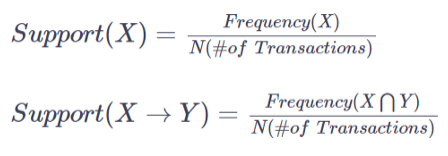

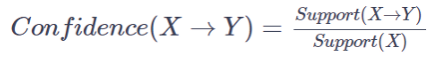

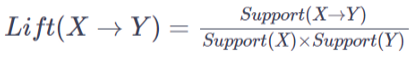

In [70]:
frequent_itemsets2 = frequent_itemsets2.sort_values(by = ['lift'],ascending = False)
frequent_itemsets2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
8,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
9,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888
2,( Sugar Cookies),( White Bread),0.055107,0.119030,0.035268,0.640000,5.376790,0.028709,2.447139
5,( Tomatoes),( White Bread),0.066128,0.119030,0.040411,0.611111,5.134088,0.032540,2.265351
6,( Canned Tuna),( White Bread),0.054372,0.119030,0.033064,0.608108,5.108859,0.026592,2.247992
4,( Toothpaste),( White Bread),0.079353,0.119030,0.047759,0.601852,5.056299,0.038314,2.212669
3,( Salsa Dip),( Eggs),0.049963,0.122704,0.030860,0.617647,5.033639,0.024729,2.294467


In [71]:
top5 = frequent_itemsets2.head()
top5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,( Hot Dog Buns),( Hot Dogs),0.058780,0.092579,0.041881,0.712500,7.696131,0.036439,3.156247
0,( Hamburger Buns),(No-Fat Hamburger),0.071271,0.093314,0.048494,0.680412,7.291663,0.041843,2.837051
8,( Hot Dog Buns),( Sweet Relish),0.058780,0.085231,0.036003,0.612500,7.186315,0.030993,2.360693
9,( Shampoo),( White Bread),0.039677,0.119030,0.027186,0.685185,5.756401,0.022463,2.798375
1,( Sugar Cookies),( Eggs),0.055107,0.122704,0.036738,0.666667,5.433134,0.029976,2.631888


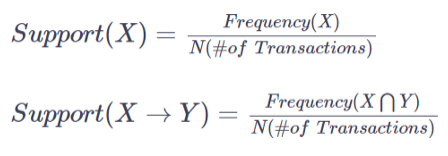

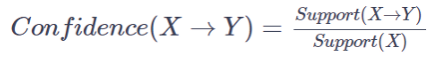

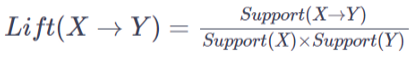

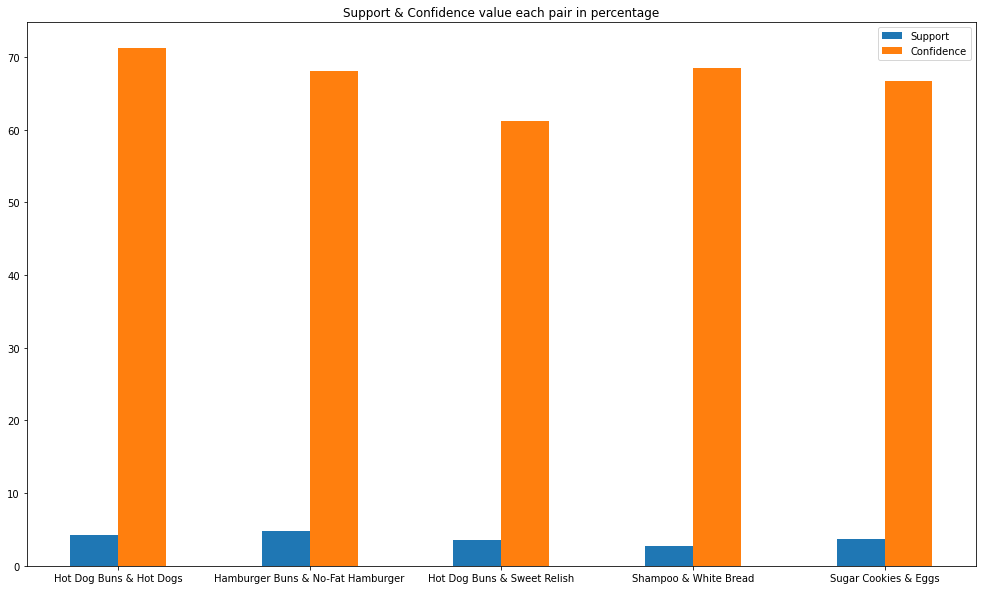

In [73]:
N = 5                                   # Numbers of pairs

# Data on X-axis

sup_bar = top5['support']*100           # Specify the values of bars (percentage)
conf_bar = top5['confidence']*100       # Specify the values of bars (percentage)

ind = np.arange(N)                      # Position of bars on x-axis

plt.figure(figsize = (17, 10))          # Figure size
 
width = 0.25                            # Width of a bar

# Plotting
plt.bar(ind, sup_bar, width, label = 'Support')
plt.bar(ind + width, conf_bar, width, label = 'Confidence')

plt.title('Support & Confidence value each pair in percentage')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + (width/2), ('Hot Dog Buns & Hot Dogs', 'Hamburger Buns & No-Fat Hamburger',
                             'Hot Dog Buns & Sweet Relish', 'Shampoo & White Bread',
                             'Sugar Cookies & Eggs'))

# Finding the best position for legends
plt.legend(loc = 'best')
plt.show()